<a href="https://colab.research.google.com/github/Fireiest/ibit_nft/blob/main/MC_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  8 of 8 completed
[0.13512811 0.17114605 0.26605894 0.02278549 0.07568583 0.15113592
 0.02179588 0.15626378]


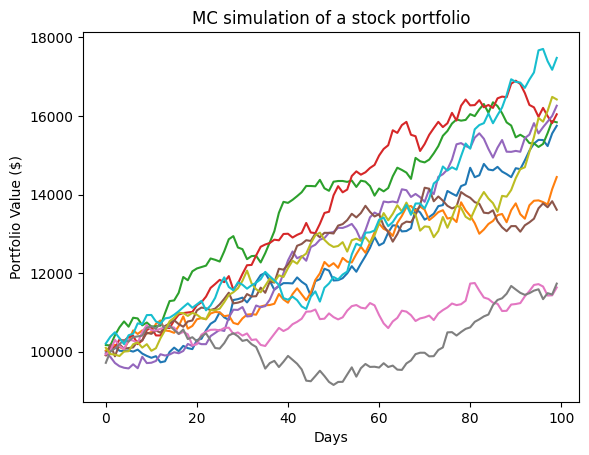

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)['Close']
    returns = stockData.pct_change()
    meanReturn = returns.mean()
    covMatrix = returns.cov()
    return meanReturn, covMatrix

stockList = ['DRREDDY.NS', 'MPHASIS.NS', 'KPITTECH.NS', 'NLCINDIA.ns', 'RRKABEL.ns', 'MCDOWELL-N.NS', 'LLOYDSENGG.NS', 'KALYANKJIL.NS']
stocks = [stock + '' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(weights)

##Monte carlo Method
##Number of simulations

mc_sims = 10
T = 100 #timeframe in days


meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000


for m in range(0, mc_sims):
  #MC loops
  Z = np.random.normal(size=(T, len(weights)))
  L = np.linalg.cholesky(covMatrix)
  dailyReturns = meanM + np.inner(L, Z)
  portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio


plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()


